# Physics 21 Spring 2021
# Assignment 2

In [345]:
import numpy as np, scipy.fft as fft
from matplotlib import pyplot as plt
from astropy.timeseries import LombScargle

## Part 1e

### Cosine

In [324]:
C, A, f, phi = 5, 2, 1, 1

In [325]:
samplingRate = 10
t_values = np.arange(-10, 10, 1/samplingRate)
cosine_data = C + A * np.cos(2 * np.pi * f * t_values + phi) 

<IPython.core.display.Javascript object>


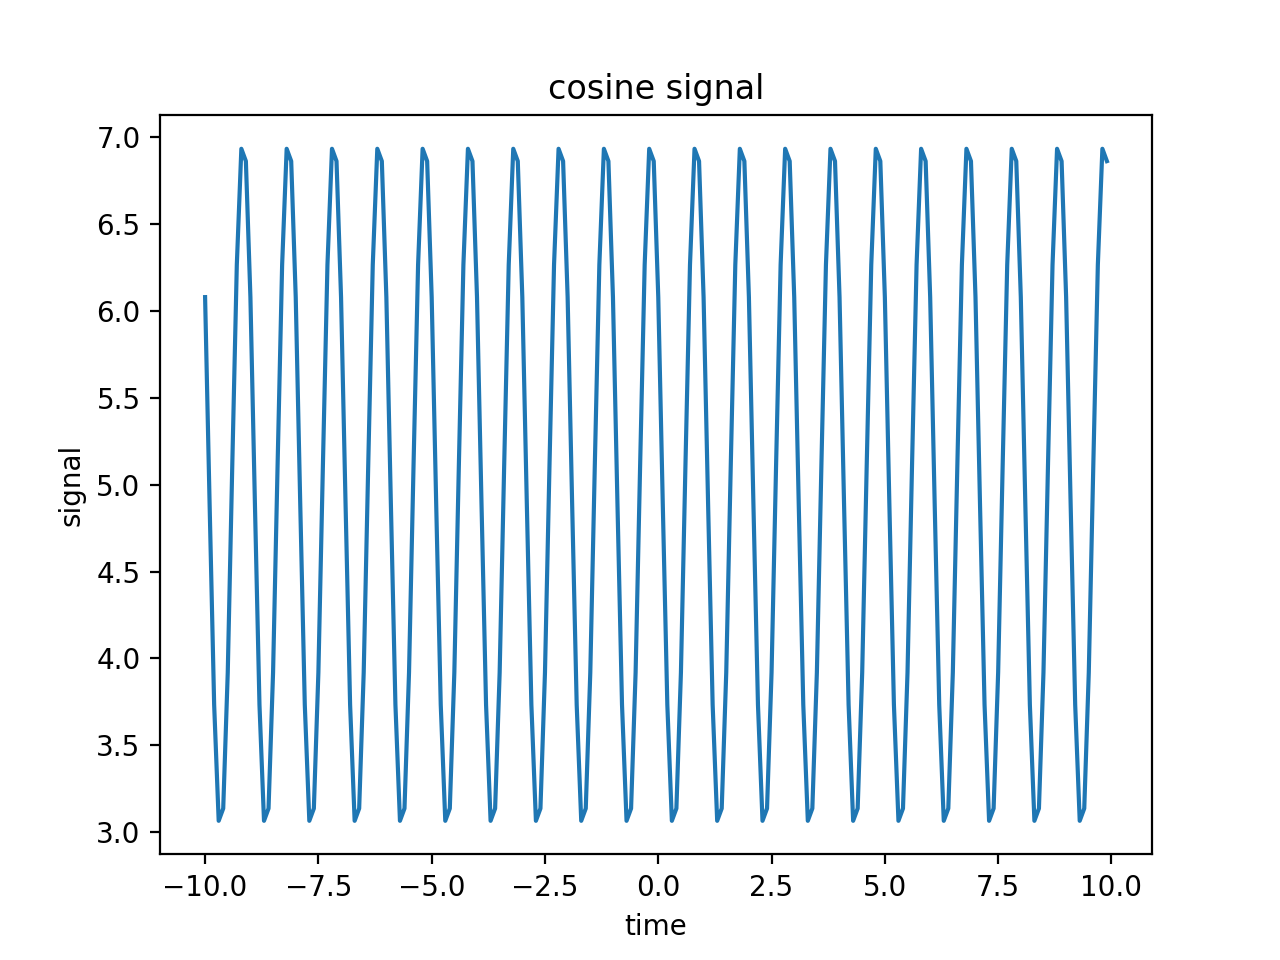

In [326]:
%matplotlib notebook
plt.plot(t_values, cosine_data)
plt.xlabel("time")
plt.ylabel("signal")
plt.title("cosine signal")
plt.savefig("plots/cosine_signal.png")

<IPython.core.display.Javascript object>


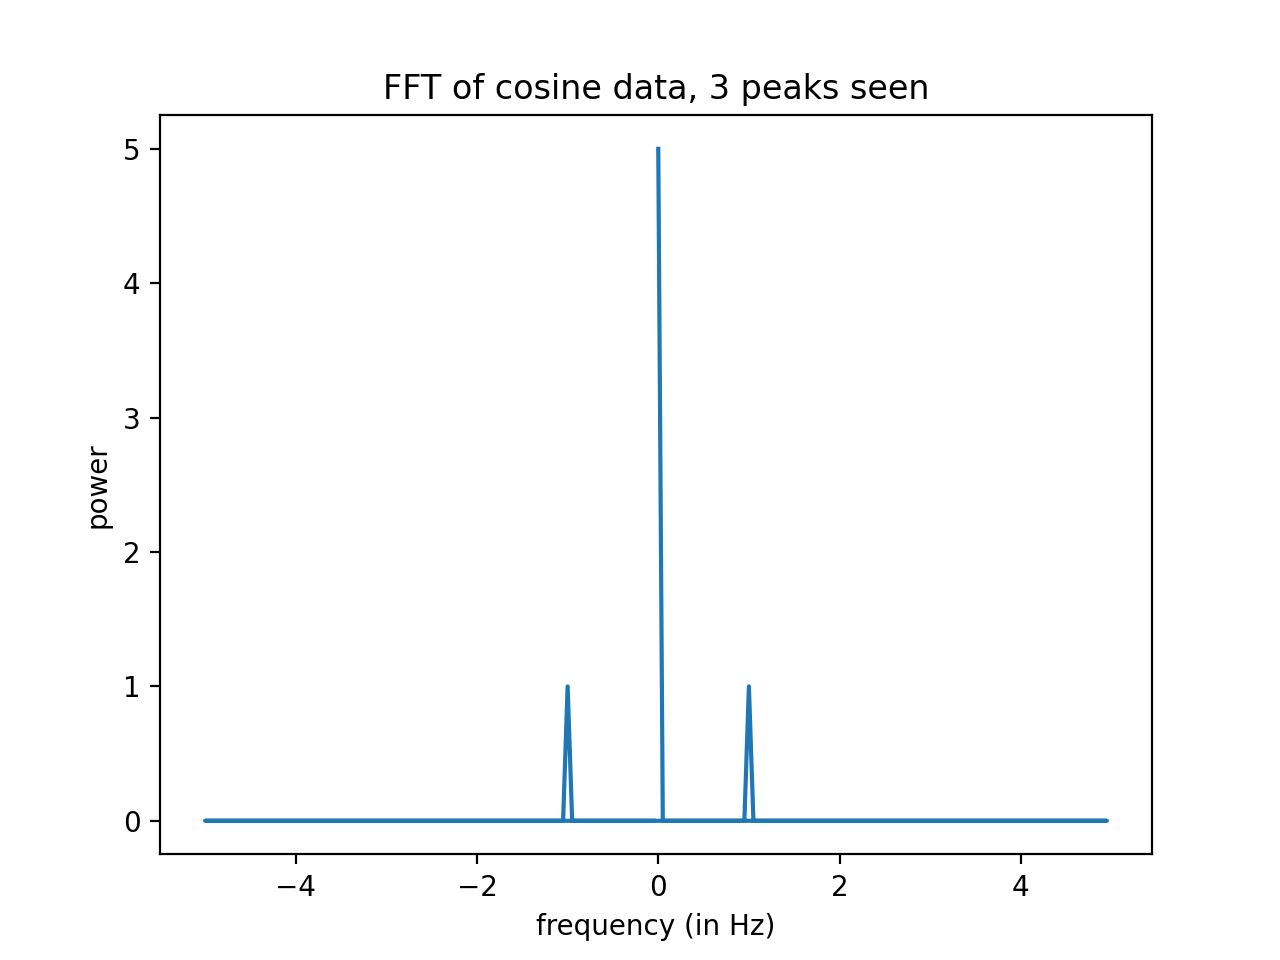

In [327]:
%matplotlib notebook
# makes plots interactive

fft_data = fft.fft(cosine_data) / len(cosine_data)
freqs = fft.fftfreq(len(cosine_data), 1/samplingRate)

plt.plot(freqs, abs(fft_data))
plt.xlabel("frequency (in Hz)")
plt.ylabel("power")
plt.title("FFT of cosine data, 3 peaks seen")
plt.savefig("plots/cosine_fft.png")

<IPython.core.display.Javascript object>


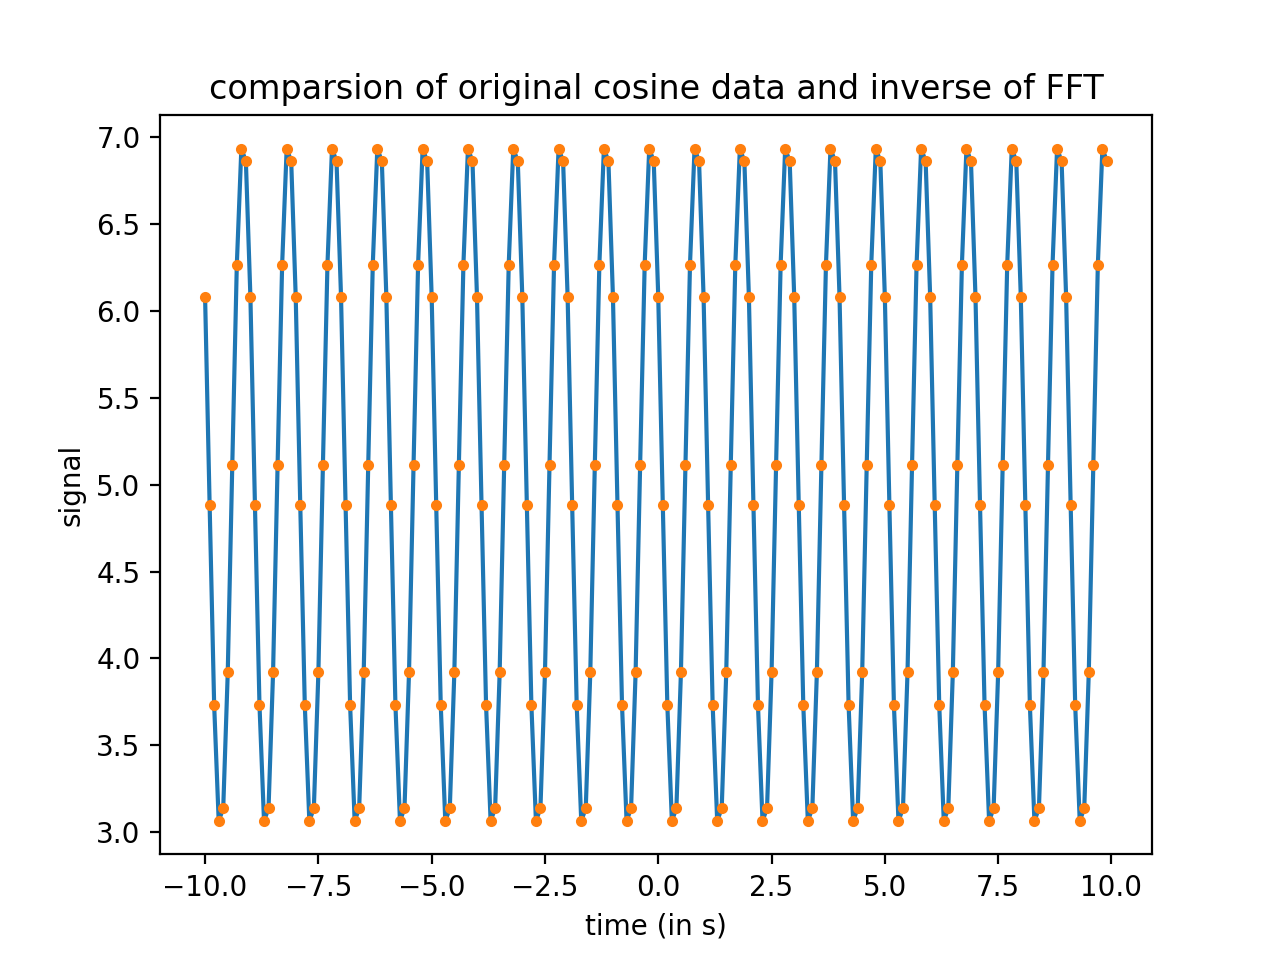

/Users/ss4833/opt/anaconda3/envs/shubh/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [328]:
%matplotlib notebook
# makes plots interactive

ifft_data = fft.ifft(fft_data) * len(t_values)

plt.plot(t_values, ifft_data)
plt.plot(t_values, cosine_data, '.')
plt.xlabel("time (in s)")
plt.ylabel("signal")
plt.title("comparsion of original cosine data and inverse of FFT")
plt.savefig("plots/cosine_inverse.png")

### Gaussian

In [330]:
A, B, L = 5, 50, 1 

In [331]:
samplingRate = 100
t_values = np.arange(-2, 2, 1/samplingRate)
gaussian_data = A * np.exp(-B * (t_values - L / 2) ** 2)

<IPython.core.display.Javascript object>


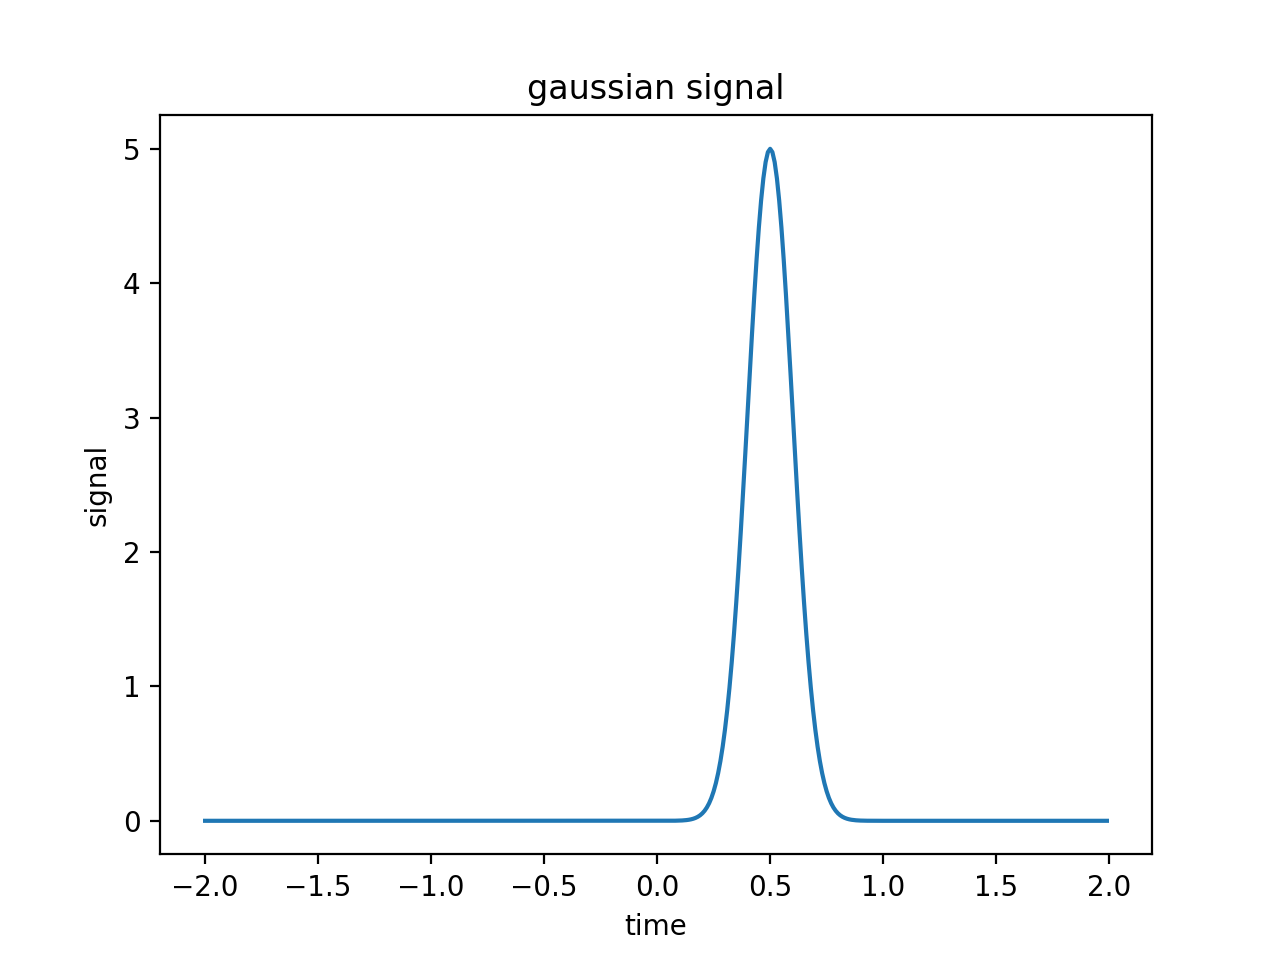

In [332]:
%matplotlib notebook
plt.plot(t_values, gaussian_data)
plt.xlabel("time")
plt.ylabel("signal")
plt.title("gaussian signal")
plt.savefig("plots/gauss_signal.png")

<IPython.core.display.Javascript object>


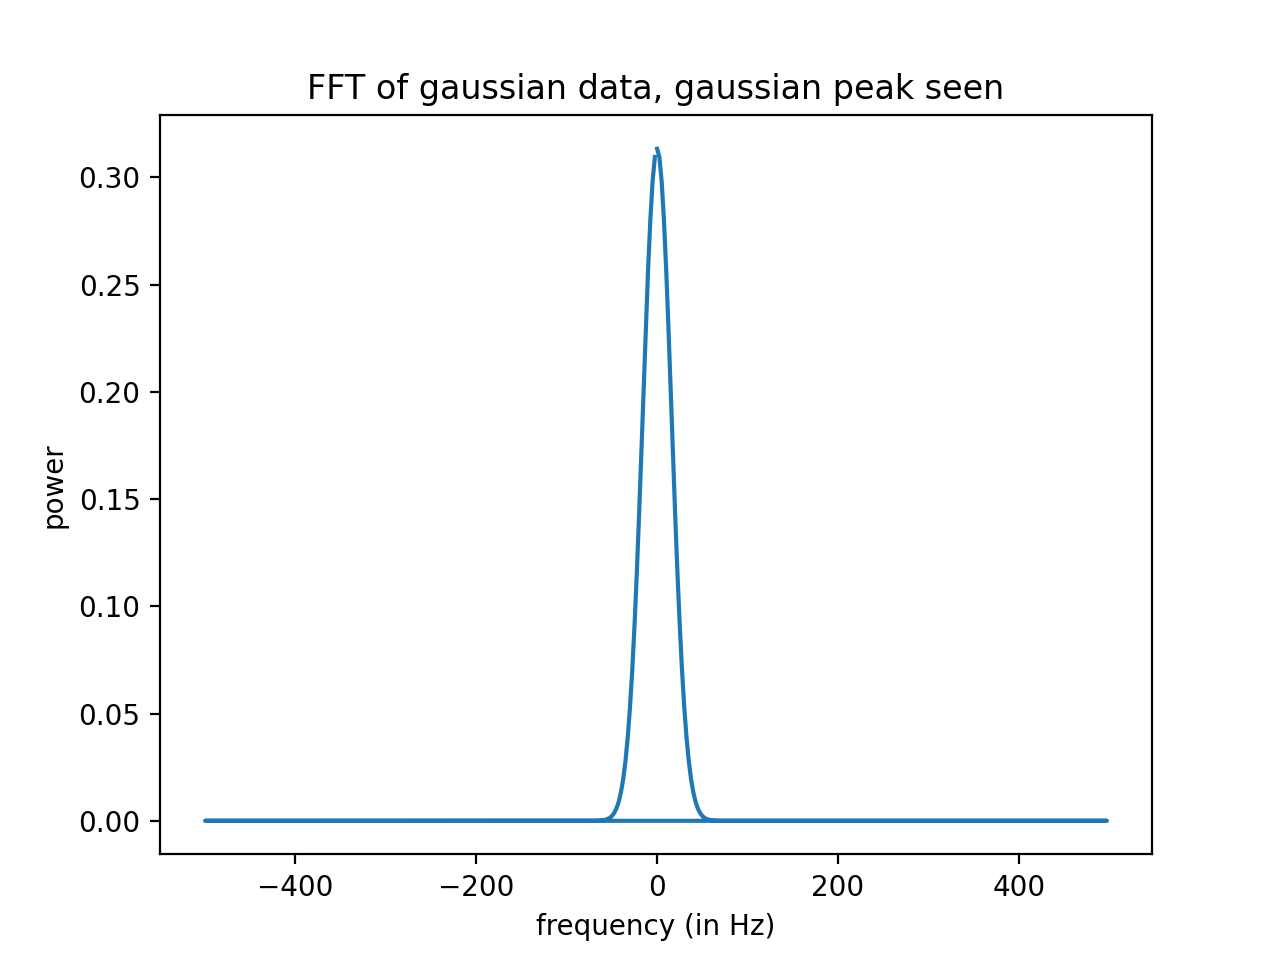

In [351]:
%matplotlib notebook
# makes plots interactive

fft_data = fft.fft(gaussian_data) / len(gaussian_data)
freqs = fft.fftfreq(len(gaussian_data), 1/samplingRate)

plt.plot(freqs, abs(fft_data))
plt.xlabel("frequency (in Hz)")
plt.ylabel("power")
plt.title("FFT of gaussian data, gaussian peak seen")
plt.savefig("plots/gauss_fft.png")

<IPython.core.display.Javascript object>


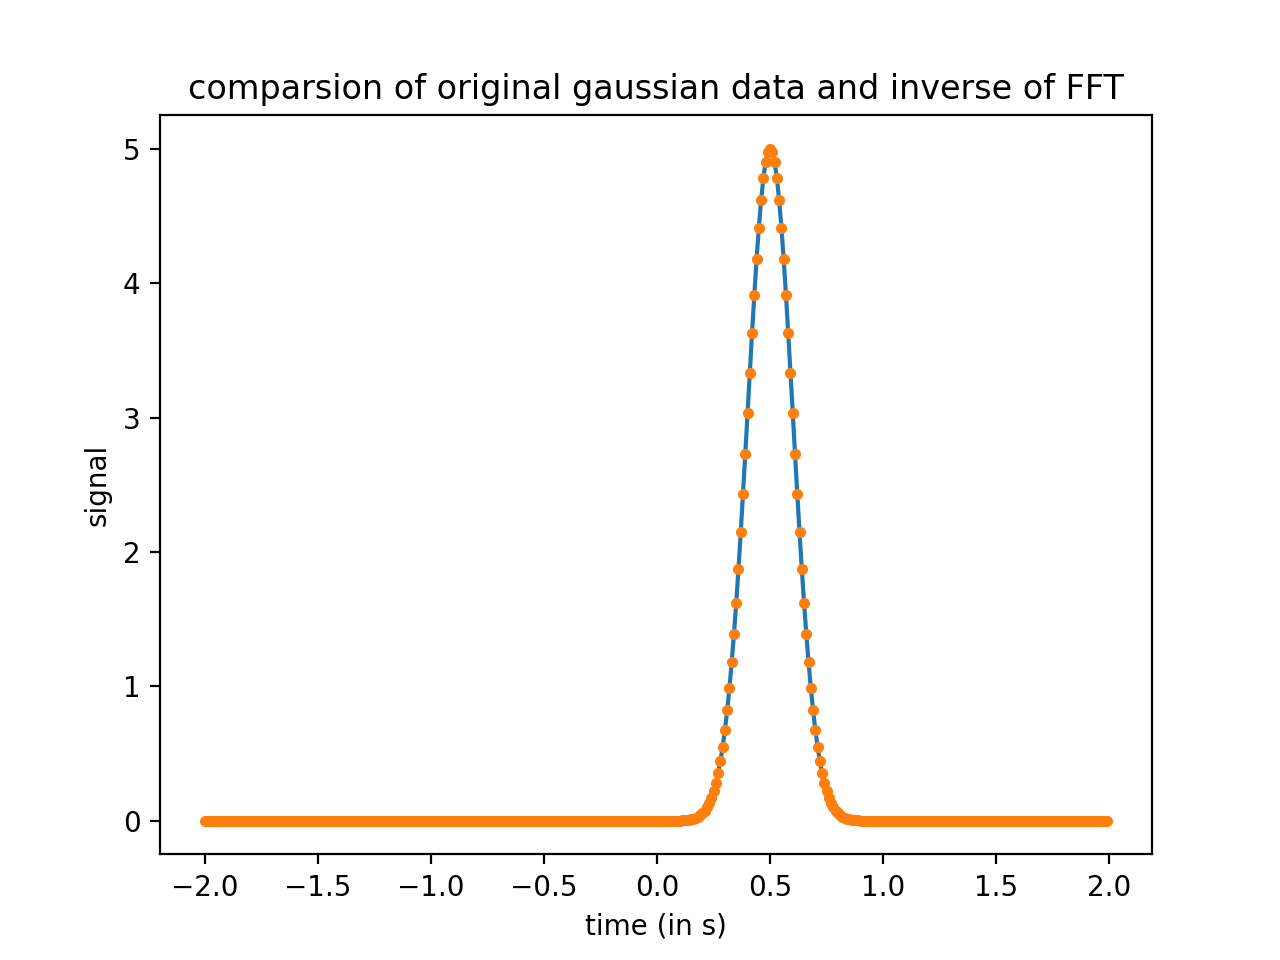

/Users/ss4833/opt/anaconda3/envs/shubh/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [334]:
%matplotlib notebook
# makes plots interactive

ifft_data = fft.ifft(fft_data) * len(t_values)

plt.plot(t_values, ifft_data)
plt.plot(t_values, gaussian_data, '.')
plt.xlabel("time (in s)")
plt.ylabel("signal")
plt.title("comparsion of original gaussian data and inverse of FFT")
plt.savefig("plots/gauss_inverse.png")

## Part 2a

In [373]:
# get the data from text file and convert to np array
file = open("./data/arecibo1.txt", 'r') 
data = np.array(file.readlines(), dtype=float)
print(data, len(data))

[-2.05081572  0.88440406  0.66505975 ... -2.48290914 -0.65188299
 -0.58959037] 32768


<IPython.core.display.Javascript object>


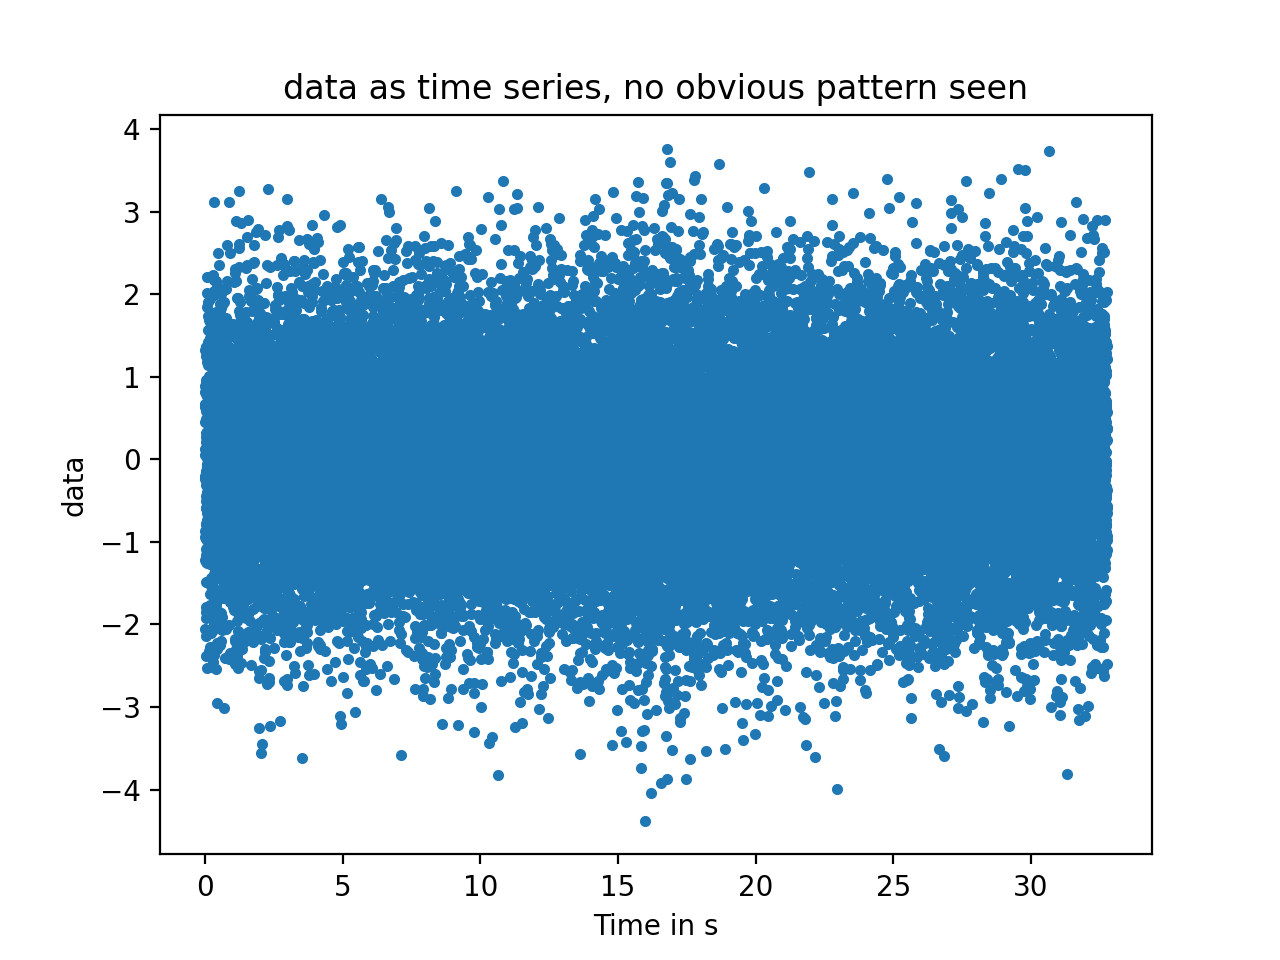

In [336]:
%matplotlib notebook
# makes plots interactive

samplingRate = 1000 # 1 millisecond <-> i kilohertz

times = np.arange(0, len(data)) / samplingRate

plt.plot(times, data, '.')
plt.xlabel("Time in s")
plt.ylabel("data")
plt.title("data as time series, no obvious pattern seen")
plt.savefig("plots/arecibo_time.png")

<IPython.core.display.Javascript object>


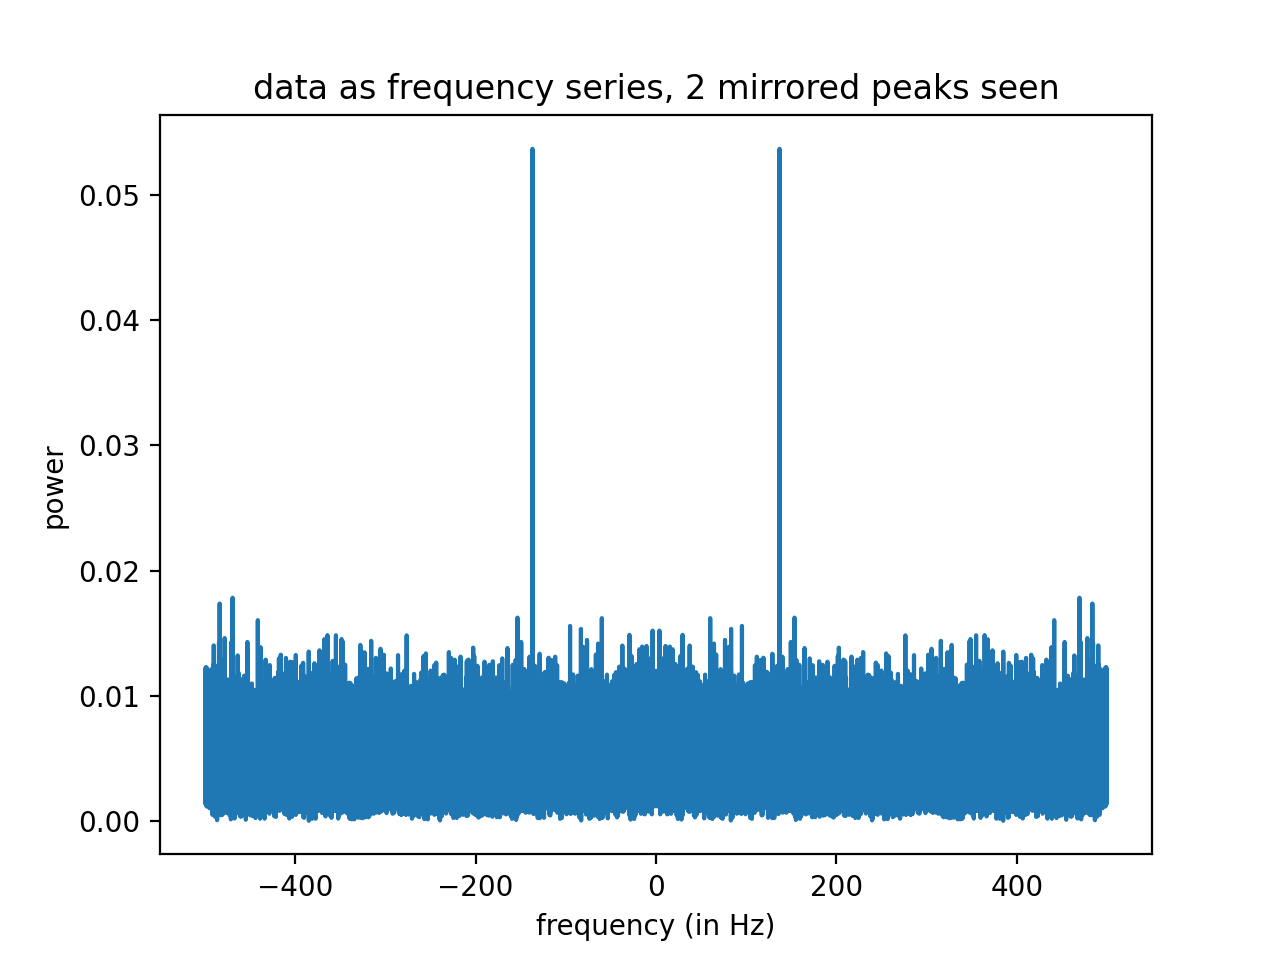

In [337]:
%matplotlib notebook
# makes plots interactive

freq_data = fft.fft(data) / len(data)
freqs = fft.fftfreq(len(data), 1/samplingRate)

plt.plot(freqs, abs(freq_data))
plt.xlabel("frequency (in Hz)")
plt.ylabel("power")
plt.title("data as frequency series, 2 mirrored peaks seen")
plt.savefig("plots/arecibo_freq.png")

In [138]:
# select the max power frequency
max_index = np.argmax(abs(freq_data))
max_freq = abs(freqs[max_index])
print(max_freq)

136.993408203125


<IPython.core.display.Javascript object>


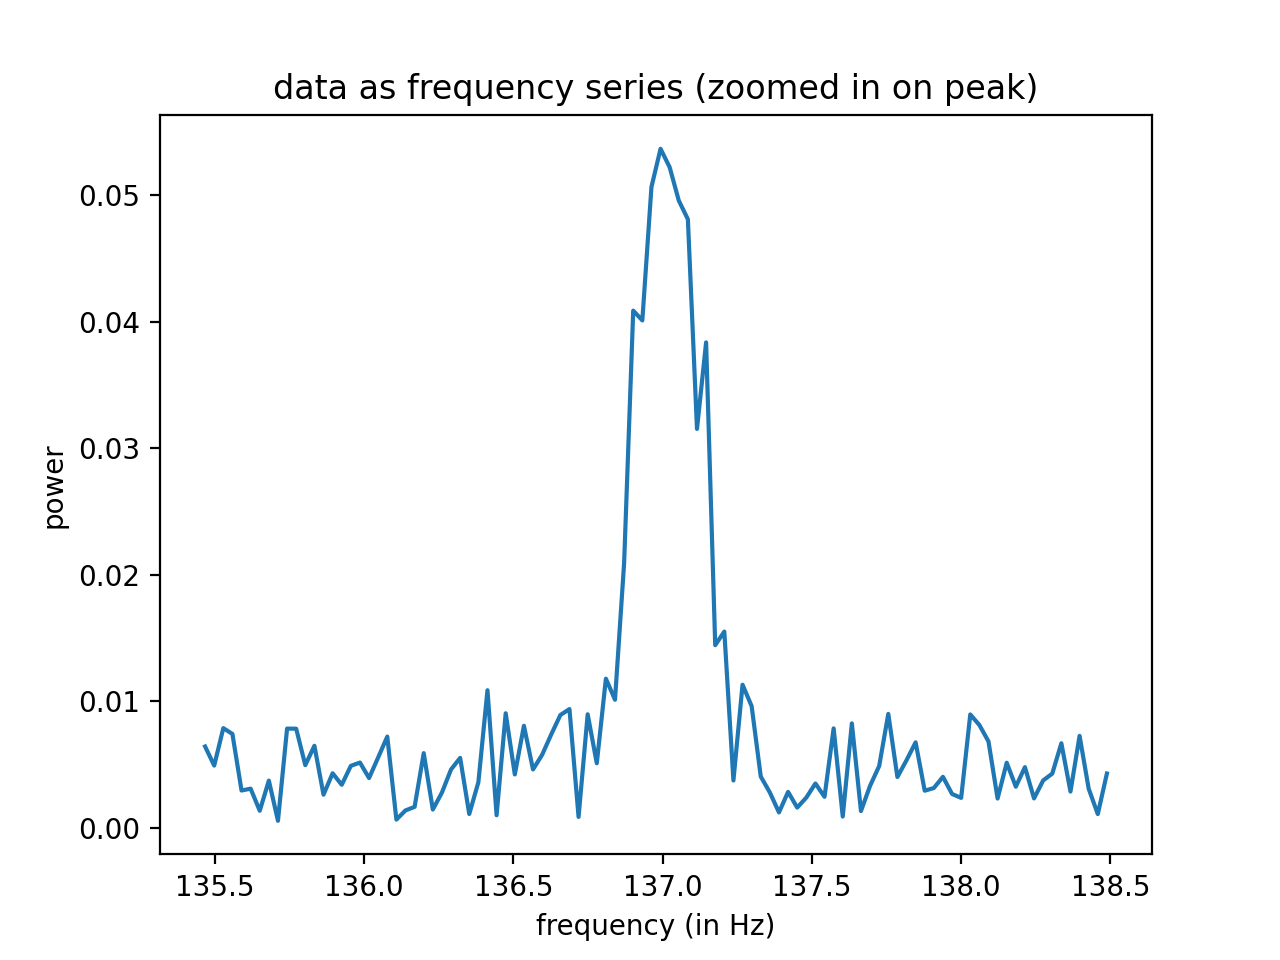

In [338]:
window_size = 50
plt.plot(freq[max_index-window_size: max_index+window_size], 
         abs(freq_data)[max_index-window_size: max_index+window_size])
plt.xlabel("frequency (in Hz)")
plt.ylabel("power")
plt.title("data as frequency series (zoomed in on peak)")
plt.savefig("plots/arecibo_freq_zoom.png")

## Part 2b

In [140]:
def gaussian_sinusoidal(times, f, t0, dT):
    return np.sin(2 * np.pi * f * times) * np.exp(- ((times - t0) / dT) ** 2)

<IPython.core.display.Javascript object>


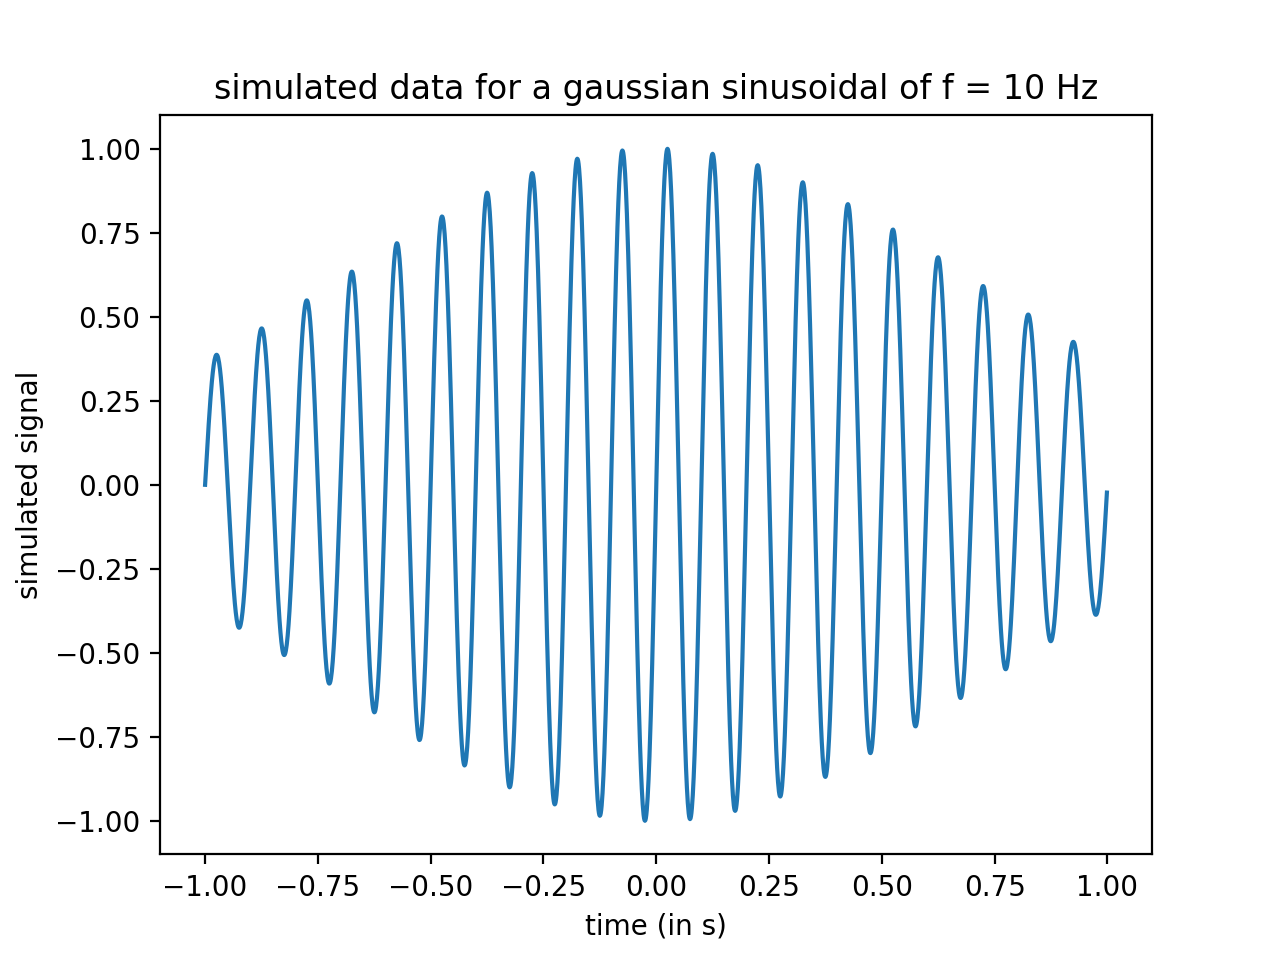

In [339]:
%matplotlib notebook
g_times = np.arange(-1.0, 1.0, 1/samplingRate)
g_signal = gaussian_sinusoidal(g_times, 10, 0, 1)
plt.plot(g_times, g_signal)
plt.ylabel("simulated signal")
plt.xlabel("time (in s)")
plt.title("simulated data for a gaussian sinusoidal of f = 10 Hz")
plt.savefig("plots/arecibo_gauss_sim.png")

<IPython.core.display.Javascript object>


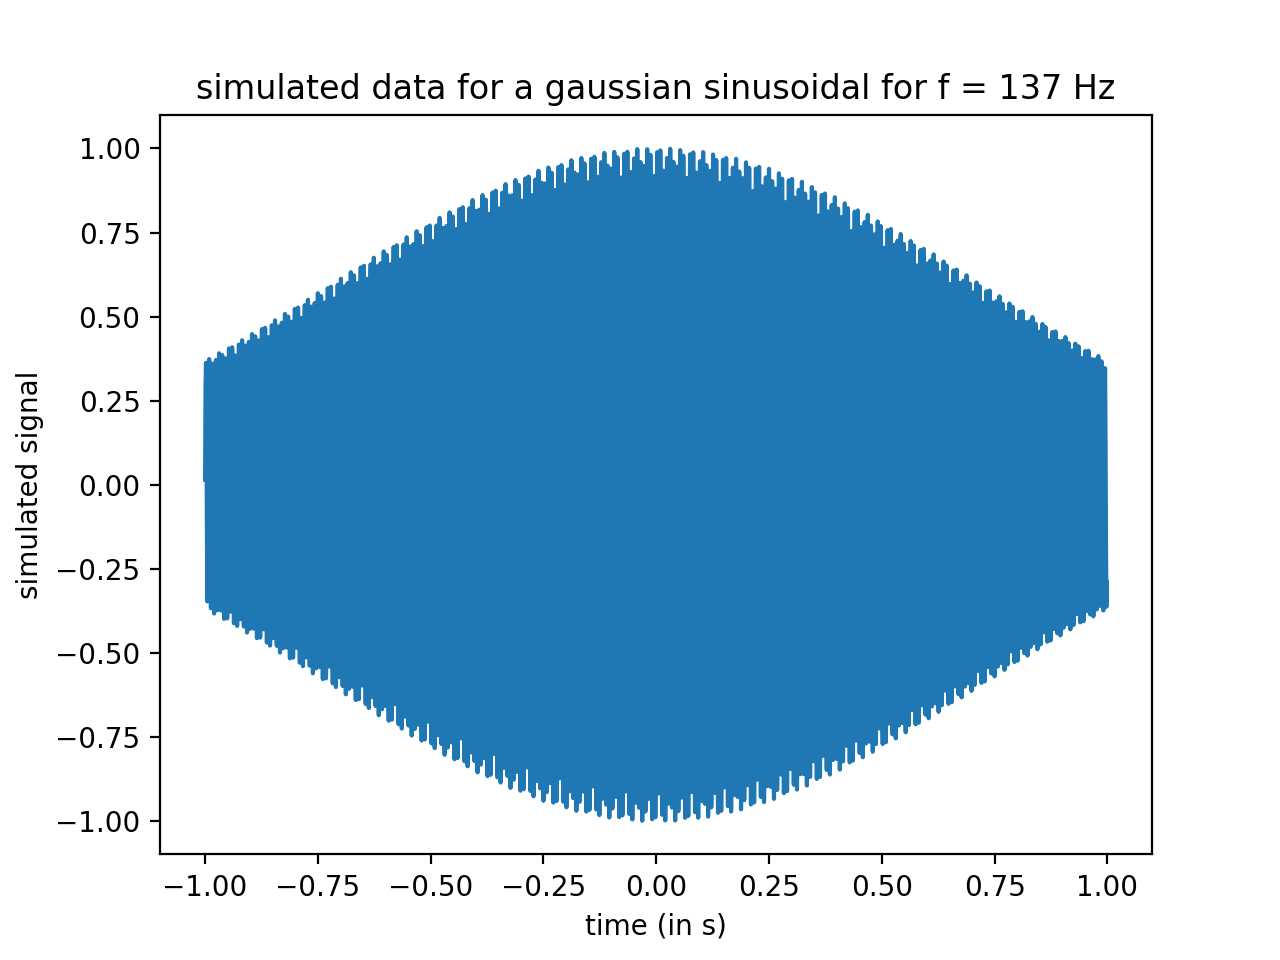

In [340]:
%matplotlib notebook
g_signal = gaussian_sinusoidal(g_times, max_freq, 0, 1)

plt.plot(g_times, g_signal)
plt.ylabel("simulated signal")
plt.xlabel("time (in s)")
plt.title("simulated data for a gaussian sinusoidal for f = 137 Hz")
plt.savefig("plots/arecibo_gauss_sim137.png")

<IPython.core.display.Javascript object>


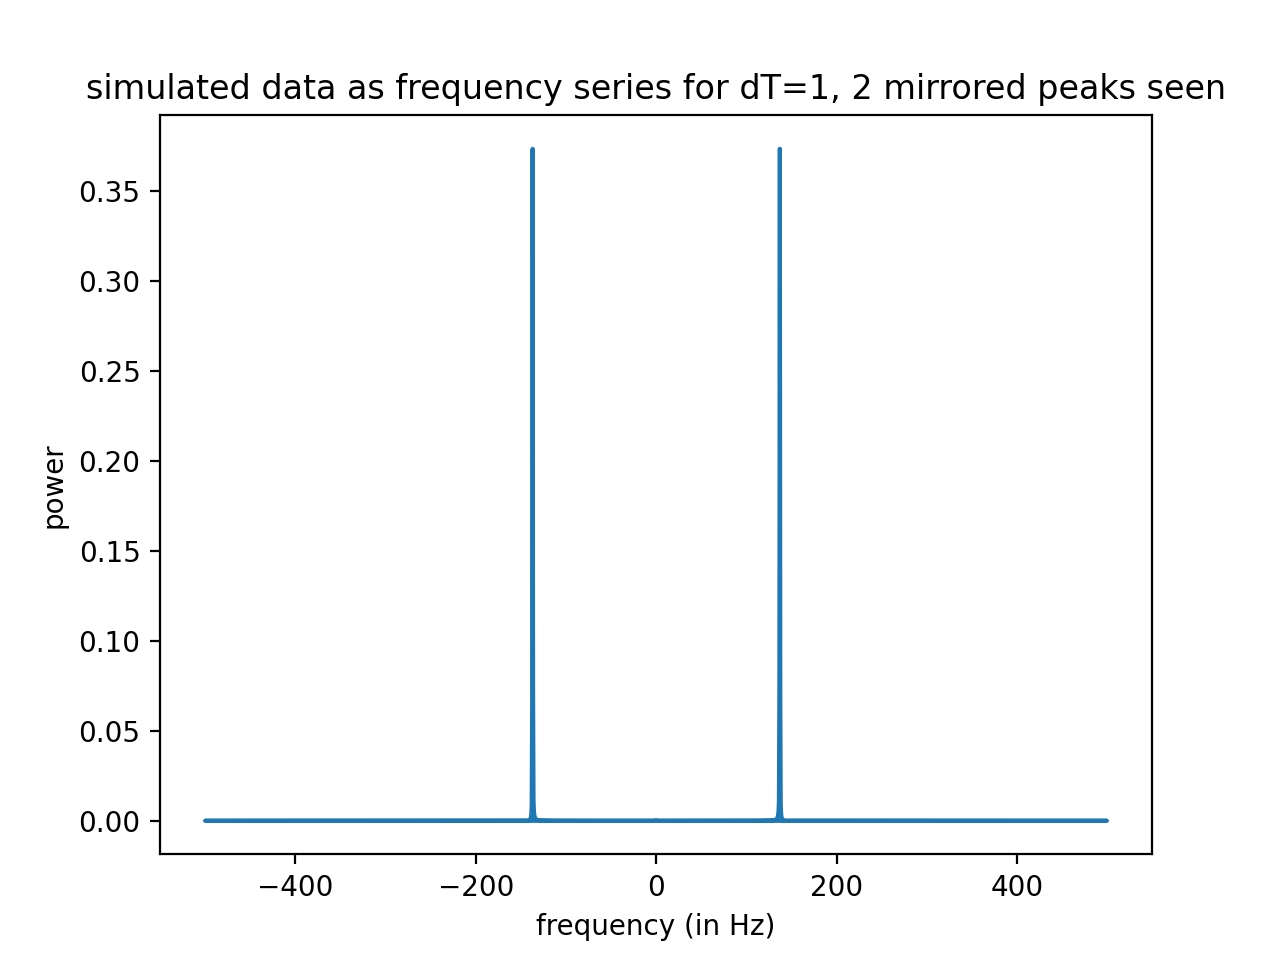

In [341]:
%matplotlib notebook
# makes plots interactive

g_freq_data = fft.fft(g_signal) / len(g_signal)
g_freqs = fft.fftfreq(len(g_signal), 1/samplingRate)

plt.plot(g_freqs, abs(g_freq_data))
plt.xlabel("frequency (in Hz)")
plt.ylabel("power")
plt.title("simulated data as frequency series for dT=1, 2 mirrored peaks seen")
plt.savefig("plots/arecibo_dT1.png")

<IPython.core.display.Javascript object>


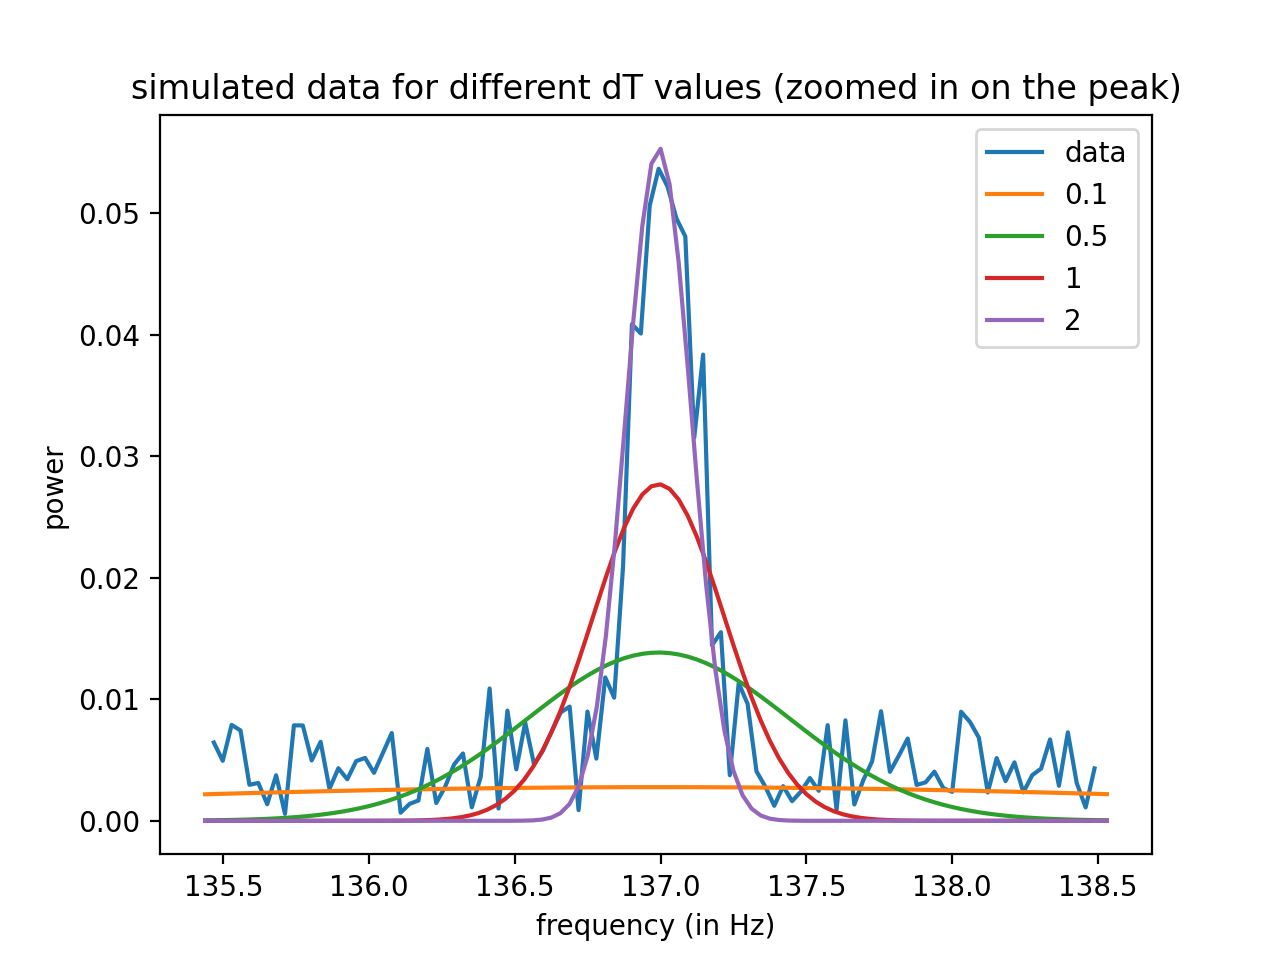

In [342]:
%matplotlib notebook
window_size = 50
plt.plot(freq[max_index-window_size: max_index+window_size], 
         abs(freq_data)[max_index-window_size: max_index+window_size], label = 'data')
plt.xlabel("frequency (in Hz)")
plt.ylabel("power")
plt.title("simulated data for different dT values (zoomed in on the peak)")

for dT in [0.1, 0.5, 1, 2]:
    g_times = np.arange(-16, 16, 1/samplingRate)
    g_signal = gaussian_sinusoidal(g_times, max_freq, 0, dT)
    
    g_freq_data = fft.fft(g_signal) / len(g_signal)
    g_freqs = fft.fftfreq(len(g_signal), 1/samplingRate)
    
    central_index = np.argmin(abs(g_freqs-max_freq))
    window_size = 50
    
    plt.plot(g_freqs[central_index-window_size: central_index+window_size], 
         abs(g_freq_data)[central_index-window_size: central_index+window_size], label = str(dT))
    
plt.legend()
plt.show()
plt.savefig("plots/arecibo_dTs.png")

<IPython.core.display.Javascript object>


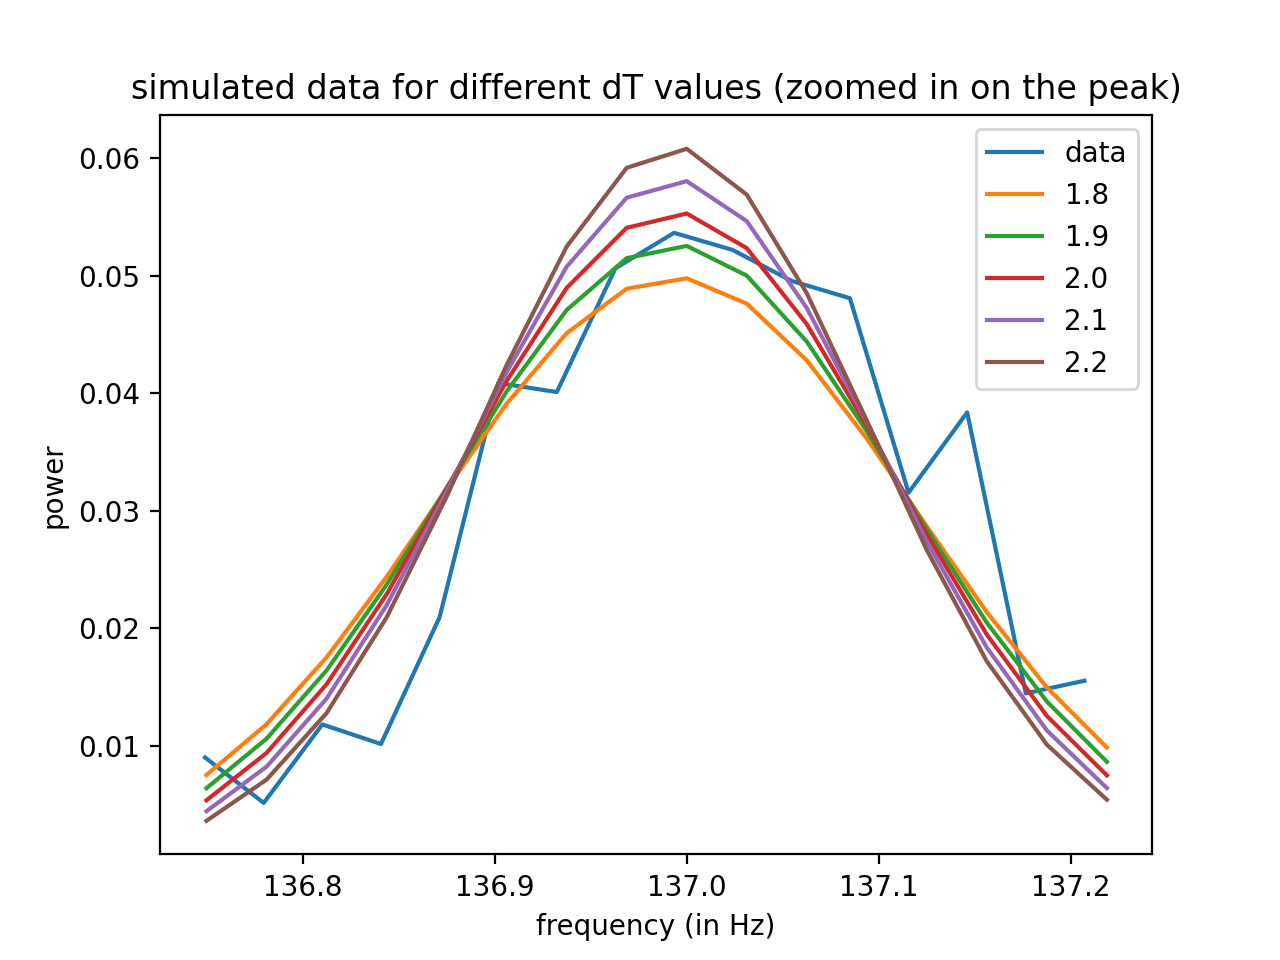

In [343]:
%matplotlib notebook
window_size = 8
plt.plot(freq[max_index-window_size: max_index+window_size], 
         abs(freq_data)[max_index-window_size: max_index+window_size], label = 'data')
plt.xlabel("frequency (in Hz)")
plt.ylabel("power")
plt.title("simulated data for different dT values (zoomed in on the peak)")

for dT in [1.8, 1.9, 2.0, 2.1, 2.2]:
    g_times = np.arange(-16, 16, 1/samplingRate)
    g_signal = gaussian_sinusoidal(g_times, max_freq, 0, dT)
    
    g_freq_data = fft.fft(g_signal) / len(g_signal)
#     g_freq_data = g_freq_data / np.max(abs(g_signal)) * np.max(abs(freq_data))
    g_freqs = fft.fftfreq(len(g_signal), 1/samplingRate)
    
    central_index = np.argmin(abs(g_freqs-max_freq))
    window_size = 8
    
    plt.plot(g_freqs[central_index-window_size: central_index+window_size], 
         abs(g_freq_data)[central_index-window_size: central_index+window_size], label = str(dT))
    
plt.legend()
plt.show()
plt.savefig("plots/arecibo_dTs2.png")

## Part 3b

Gaussian

<IPython.core.display.Javascript object>


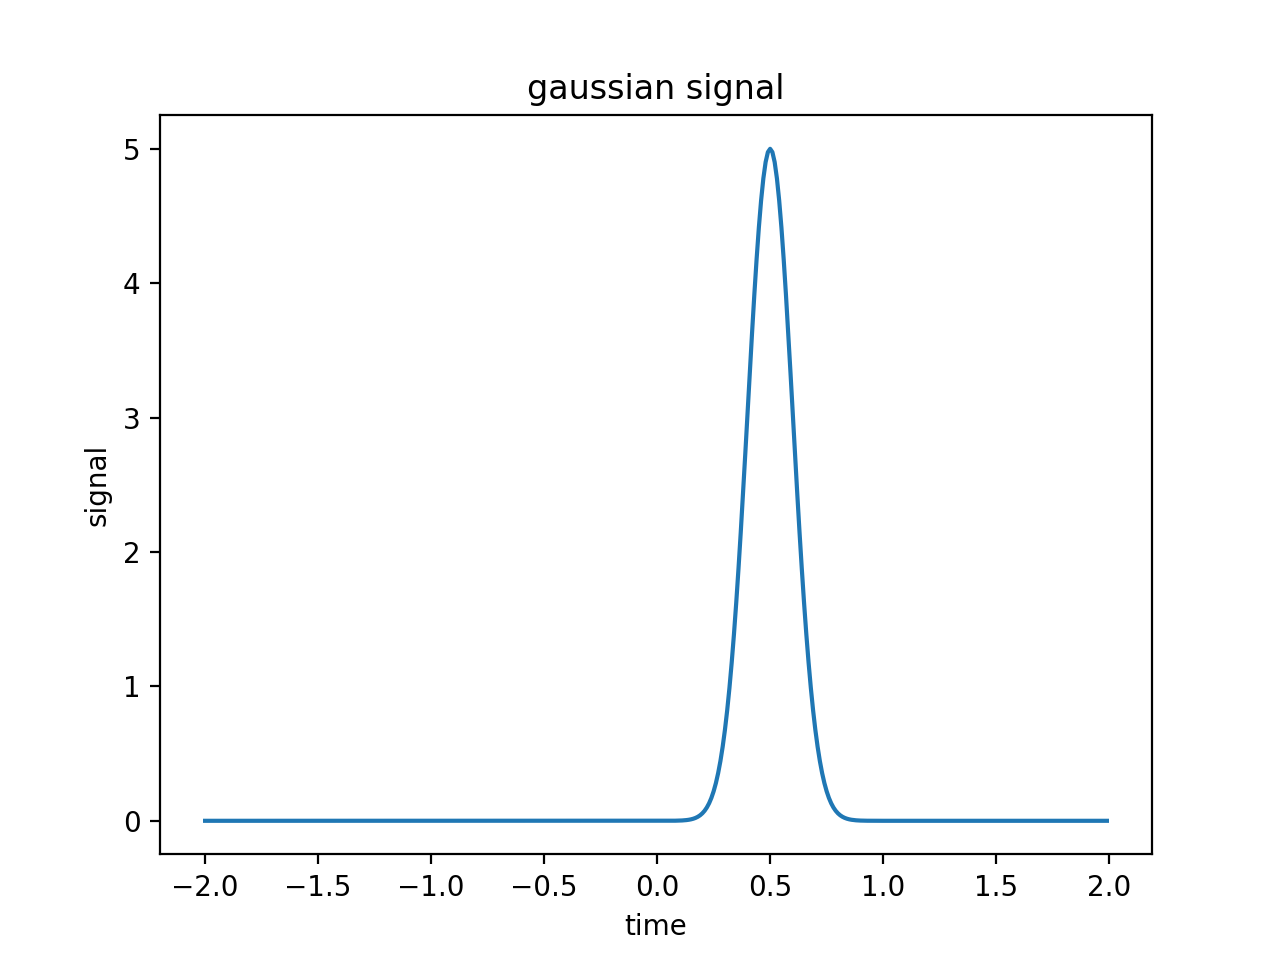

Text(0.5, 1.0, 'gaussian signal')

In [347]:
%matplotlib notebook
plt.plot(t_values, gaussian_data)
plt.xlabel("time")
plt.ylabel("signal")
plt.title("gaussian signal")

<IPython.core.display.Javascript object>


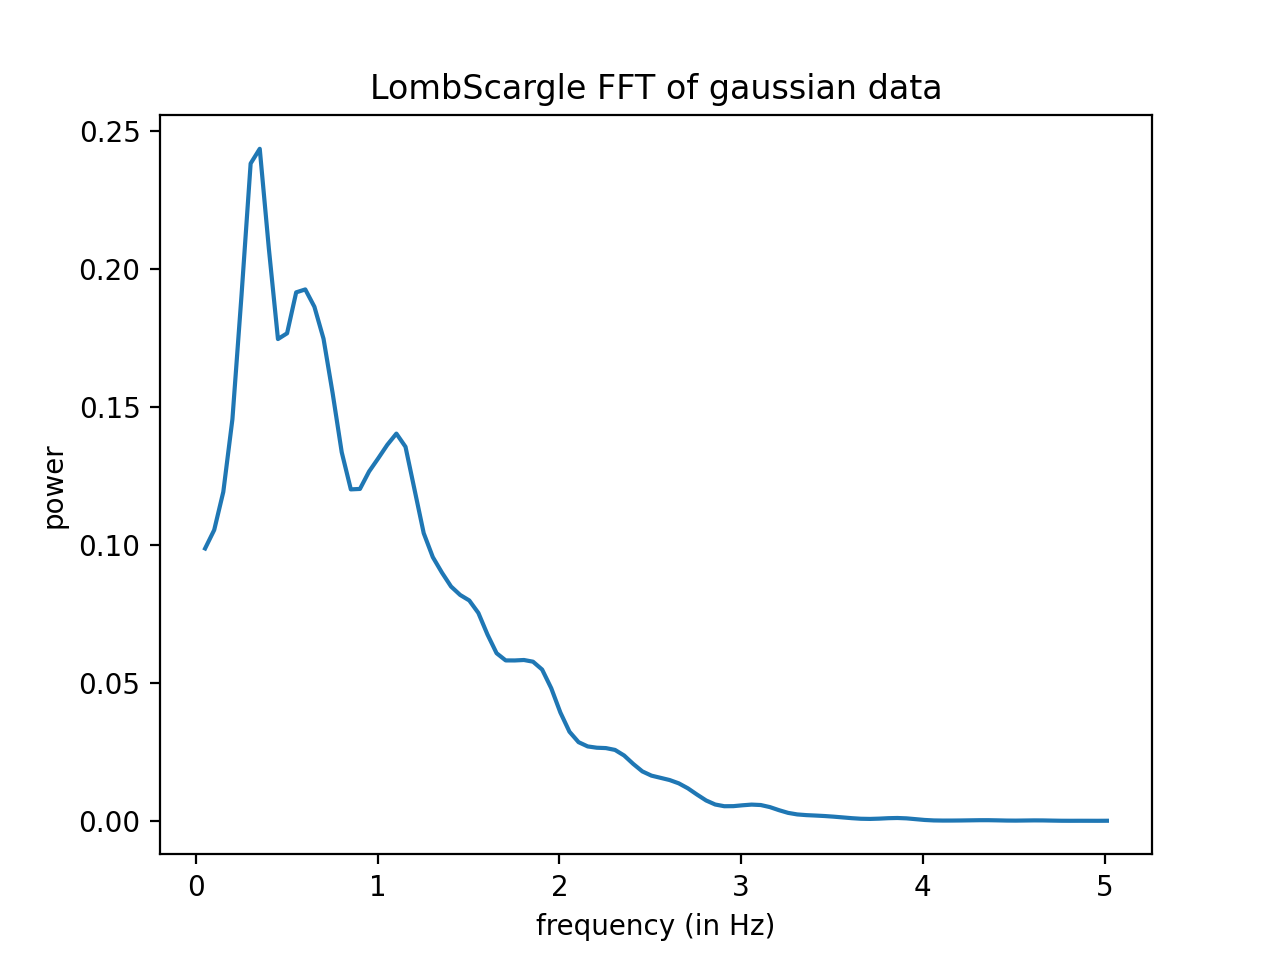

In [354]:
%matplotlib notebook

freq, power = LombScargle(t_values, gaussian_data).autopower(minimum_frequency=0, maximum_frequency=5)

plt.plot(freq, power)
plt.xlabel("frequency (in Hz)")
plt.ylabel("power")
plt.title("LombScargle FFT of gaussian data")
plt.savefig("plots/gauss_LombScargle.png")

Arecibo

<IPython.core.display.Javascript object>


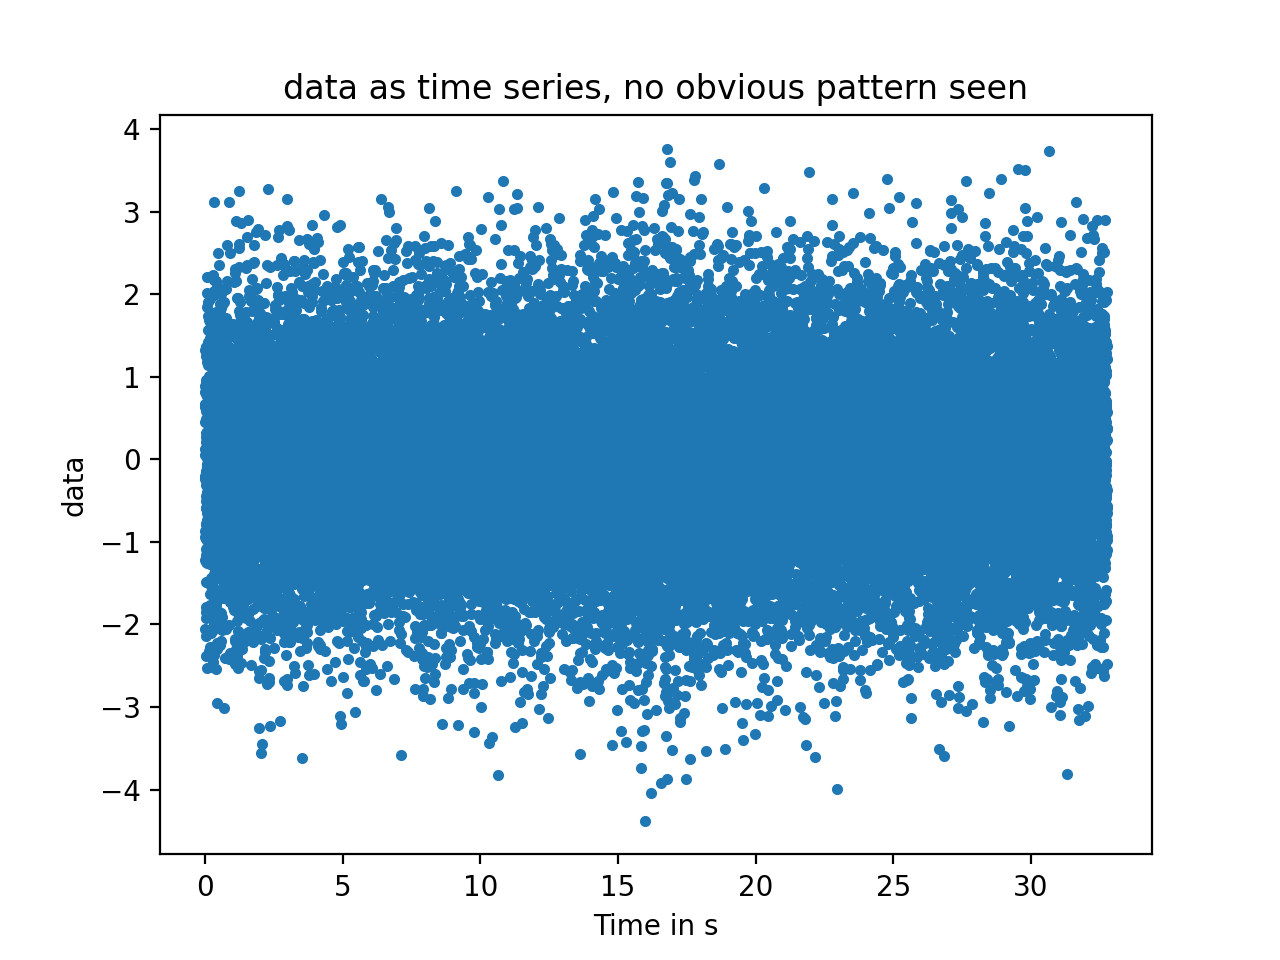

Text(0.5, 1.0, 'data as time series, no obvious pattern seen')

In [374]:
%matplotlib notebook
# makes plots interactive

plt.plot(times, data, '.')
plt.xlabel("Time in s")
plt.ylabel("data")
plt.title("data as time series, no obvious pattern seen")

/Users/ss4833/opt/anaconda3/envs/shubh/lib/python3.8/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


<IPython.core.display.Javascript object>


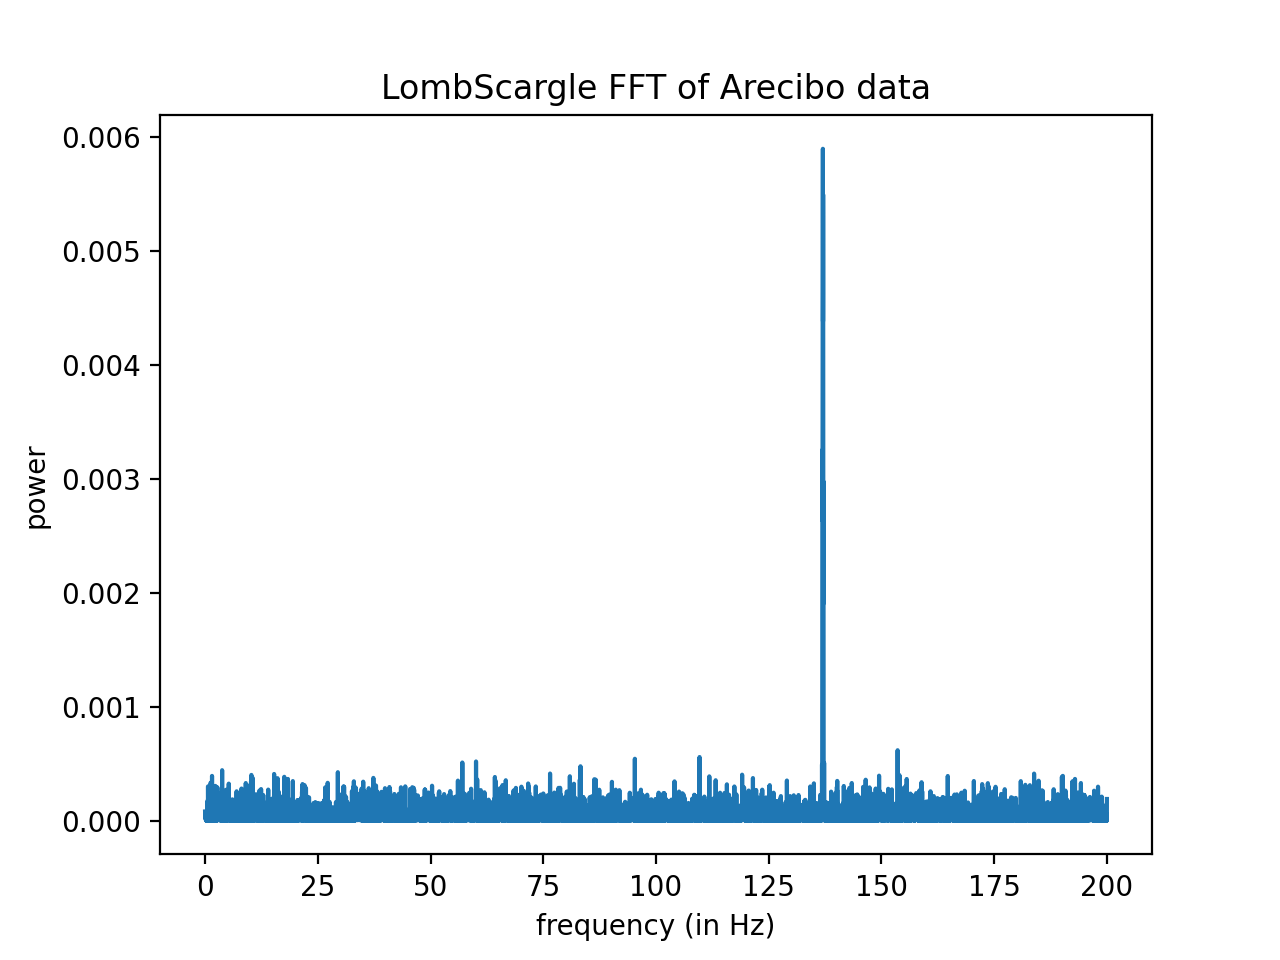

In [375]:
%matplotlib notebook

freq, power = LombScargle(times, data).autopower(minimum_frequency=0, maximum_frequency=200)

plt.plot(freq, power)
plt.xlabel("frequency (in Hz)")
plt.ylabel("power")
plt.title("LombScargle FFT of Arecibo data")
plt.savefig("plots/arecibo_LombScargle.png")

In [363]:
print(freq[np.nanargmax(power)])

137.00979644154177


## Part 3c

In [386]:
import sys
sys.path.append("../lab1")
import lab1

In [389]:
mag, mjd = lab1.getVOTvalues("../lab1/data.xml")

<IPython.core.display.Javascript object>


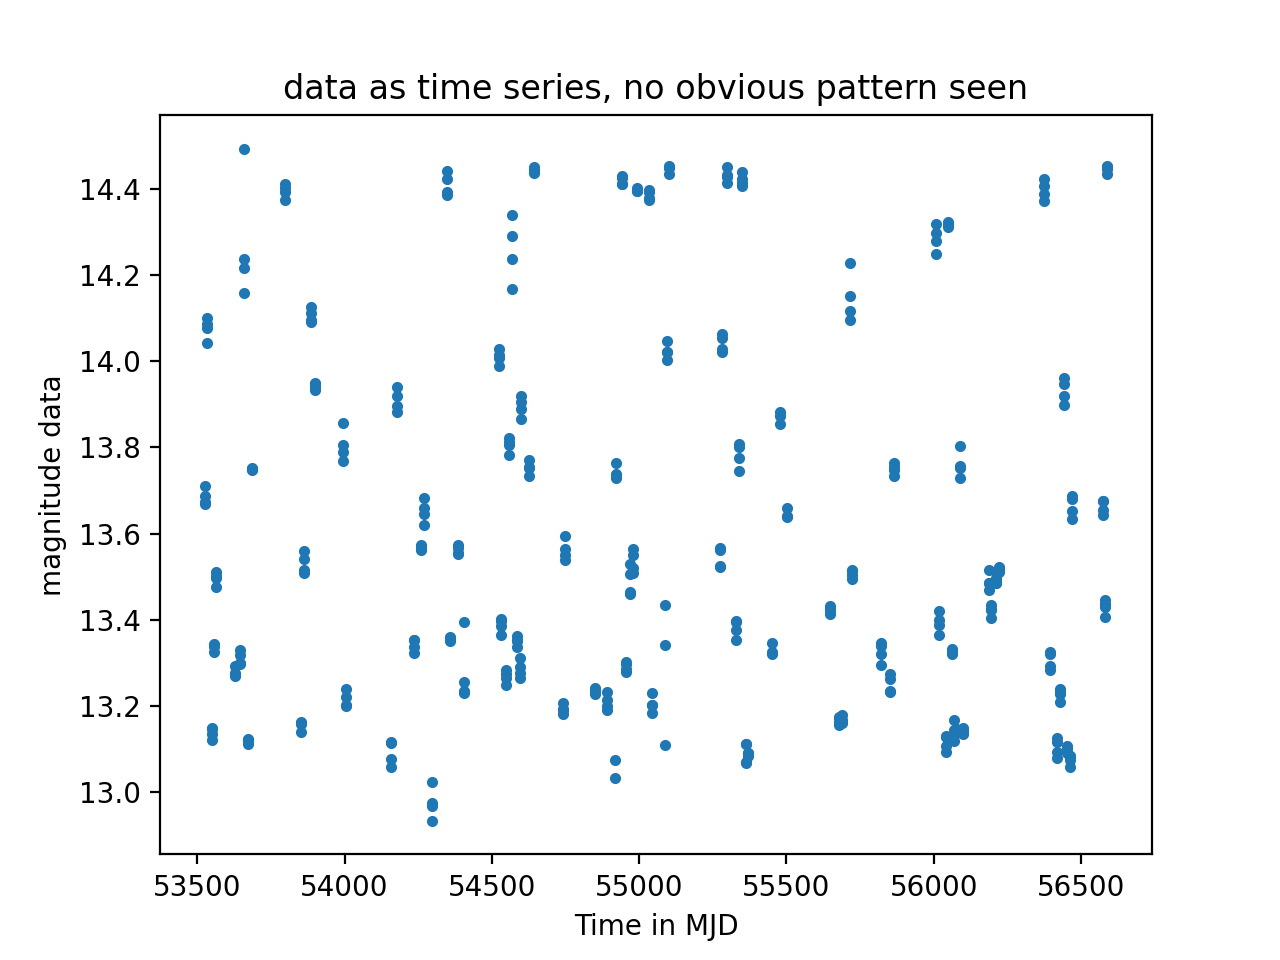

Text(0.5, 1.0, 'data as time series, no obvious pattern seen')

In [392]:
%matplotlib notebook
# makes plots interactive

plt.plot(mjd, mag, '.')
plt.xlabel("Time in MJD")
plt.ylabel("magnitude data")
plt.title("data as time series, no obvious pattern seen")

/Users/ss4833/opt/anaconda3/envs/shubh/lib/python3.8/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:122: RuntimeWarning: divide by zero encountered in true_divide
  power = (YC * YC / CC + YS * YS / SS)


<IPython.core.display.Javascript object>


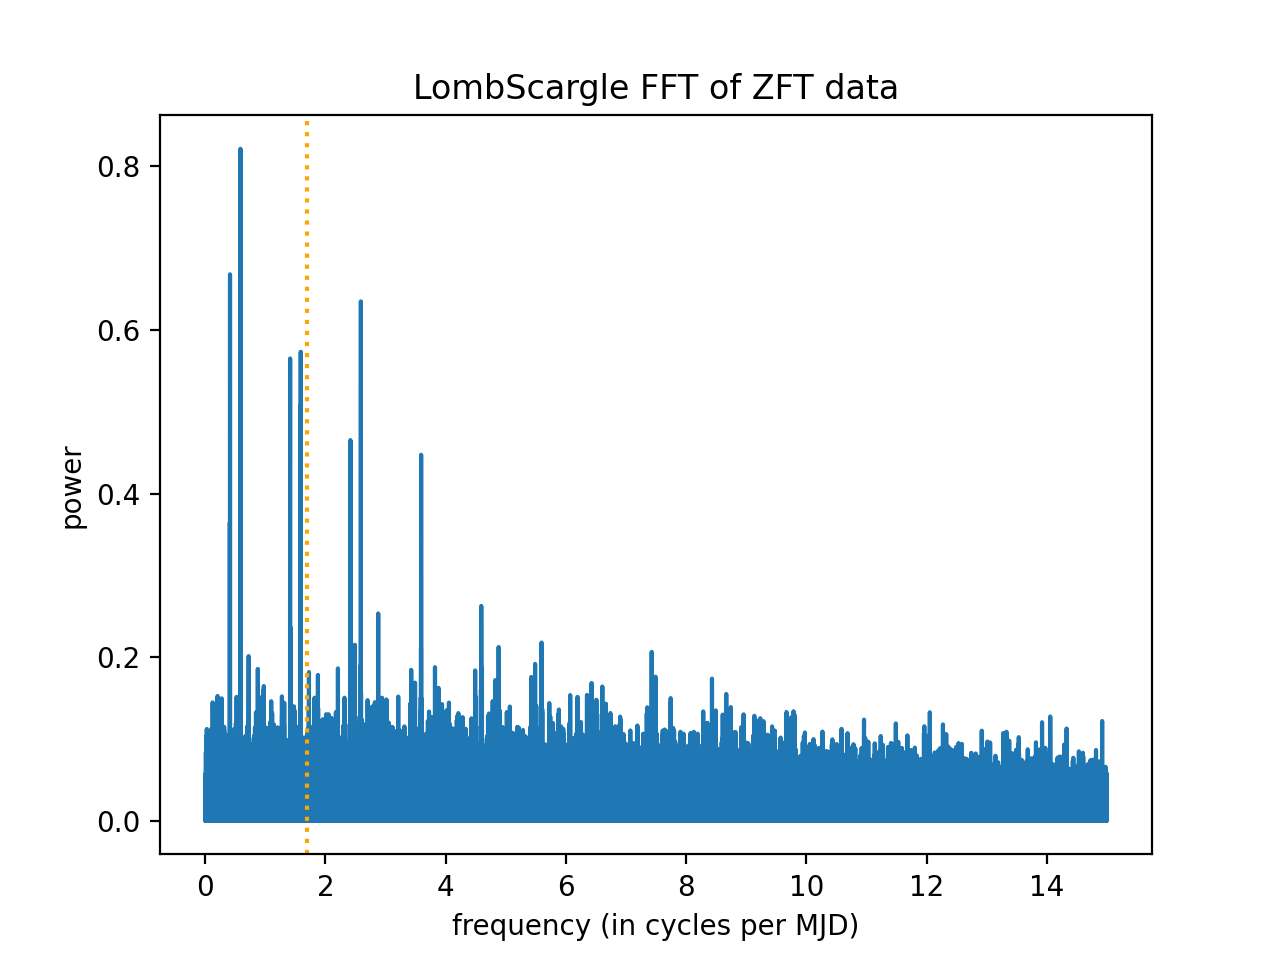

In [405]:
%matplotlib notebook

freq, power = LombScargle(mjd, mag).autopower(minimum_frequency=0, maximum_frequency=15)

plt.plot(freq, power)
plt.xlabel("frequency (in cycles per MJD)")
plt.ylabel("power")
plt.title("LombScargle FFT of ZFT data")
plt.axvline(x=1.7, color = 'orange', linestyle = ':')
plt.savefig("plots/ZFT_LombScargle.png")